<a href="https://colab.research.google.com/github/yuliah900/be-bandung-12/blob/main/Text_Preprocessing_Eng_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [ ]:
import requests
from io import StringIO
import pandas as pd

# URL of the Google Sheets CSV
avatar = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS4cpPNsu0JULuAqOj08ayZsmYoHWKuNtr6GGqlqnlgGRF1JgXd_8m52h4CFEKOUulD11dm0hxjOC41/pub?gid=1957024766&single=true&output=csv'

# Fetching the CSV data
response = requests.get(avatar)

# Checking if the request was successful
if response.status_code == 200:
    # Converting the content of the response to a string
    csv_data = response.content.decode('utf-8')

    # Creating a StringIO object to simulate a file-like object
    csv_file = StringIO(csv_data)

    # Initialize an empty list to store lines causing parsing errors
    error_lines = []

    # Read the CSV while ignoring lines causing parsing errors
    full_df = pd.read_csv(csv_file, error_bad_lines=False)

    # Display the DataFrame
    print(full_df)
else:
    print("Failed to fetch CSV data")


                          created_at               id_str  \
0     Sun Mar 24 11:50:04 +0000 2024  1771867071569072358   
1     Sun Mar 24 11:49:29 +0000 2024  1771866924470682018   
2     Sun Mar 24 11:49:18 +0000 2024  1771866880296300577   
3     Sun Mar 24 11:49:09 +0000 2024  1771866843642314825   
4     Sun Mar 24 11:48:59 +0000 2024  1771866799262331365   
...                              ...                  ...   
1502  Tue Mar 19 10:59:25 +0000 2024  1770042386212593826   
1503  Tue Mar 19 10:46:06 +0000 2024  1770039037023133767   
1504  Tue Mar 19 10:44:23 +0000 2024  1770038602463944769   
1505  Tue Mar 19 10:11:21 +0000 2024  1770030290615914766   
1506  Tue Mar 19 10:04:23 +0000 2024  1770028539041272289   

                                              full_text  quote_count  \
0     @MikeH46123995 in your own opinion out of thes...            0   
1     @PeterSciretta in your own opinion out of thes...            0   
2     @GraceRandolph in your own opinion out of the

<ipython-input-2-2c88b82d78ce>:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  full_df = pd.read_csv(csv_file, error_bad_lines=False)


In [ ]:
full_df


created_at               id_str  \
0     Sun Mar 24 11:50:04 +0000 2024  1771867071569072358   
1     Sun Mar 24 11:49:29 +0000 2024  1771866924470682018   
2     Sun Mar 24 11:49:18 +0000 2024  1771866880296300577   
3     Sun Mar 24 11:49:09 +0000 2024  1771866843642314825   
4     Sun Mar 24 11:48:59 +0000 2024  1771866799262331365   
...                              ...                  ...   
1502  Tue Mar 19 10:59:25 +0000 2024  1770042386212593826   
1503  Tue Mar 19 10:46:06 +0000 2024  1770039037023133767   
1504  Tue Mar 19 10:44:23 +0000 2024  1770038602463944769   
1505  Tue Mar 19 10:11:21 +0000 2024  1770030290615914766   
1506  Tue Mar 19 10:04:23 +0000 2024  1770028539041272289   

                                              full_text  quote_count  \
0     @MikeH46123995 in your own opinion out of thes...            0   
1     @PeterSciretta in your own opinion out of thes...            0   
2     @GraceRandolph in your own opinion out of thes...            0   
3     @ReillyBJohnson in your own opinion out of the...            0   
4     @DannyKramerVO in your own opinion out of thes...            0   
...                                                 ...          ...   
1502  Avatar: The Last Airbender Book 2 Earth (9/10)...            0   
1503  Avatar the Last Airbender (original series):  ...            0   
1504  @Blaq_Quinnie Damsel. The Gentlemen. Avatar, T...            0   
1505  It might be time for a rewatch of Avatar The L...            0   
1506  Last week, I just watched avatar the legend of...            0   

      reply_count  retweet_count  favorite_count lang          user_id_str  \
0               0              0               0   en           2681657953   
1               0              0               0   en           2681657953   
2               0              0               0   en           2681657953   
3               0              0               0   en           2681657953   
4               0              0               0   en           2681657953   
...           ...            ...             ...  ...                  ...   
1502            1              0               5   en  1690714543180435456   
1503            0              0               0   en   716300757432188928   
1504            0              0               0   en            138541575   
1505            1              0               5   en           2746174692   
1506            0              1               1   en  1085340508707160064   

      conversation_id_str        username  \
0     1771867071569072358     ShieldFan12   
1     1771866924470682018     ShieldFan12   
2     1771866880296300577     ShieldFan12   
3     1771866843642314825     ShieldFan12   
4     1771866799262331365     ShieldFan12   
...                   ...             ...   
1502  1770042386212593826      YasuanVaux   
1503  1755067315450749348     Pikabots123   
1504  1769962667492483488    DelectableUD   
1505  1770030290615914766  Ollies_Odyssey   
1506  1770028539041272289      backandwhy   

                                              tweet_url  
0     https://twitter.com/ShieldFan12/status/1771867...  
1     https://twitter.com/ShieldFan12/status/1771866...  
2     https://twitter.com/ShieldFan12/status/1771866...  
3     https://twitter.com/ShieldFan12/status/1771866...  
4     https://twitter.com/ShieldFan12/status/1771866...  
...                                                 ...  
1502  https://twitter.com/YasuanVaux/status/17700423...  
1503  https://twitter.com/Pikabots123/status/1770039...  
1504  https://twitter.com/DelectableUD/status/177003...  
1505  https://twitter.com/Ollies_Odyssey/status/1770...  
1506  https://twitter.com/backandwhy/status/17700285...  

[1507 rows x 12 columns]

In [ ]:
import pandas as pd

# Set options to display full content of cells
pd.set_option('display.max_colwidth', None)
print(full_df)


                          created_at               id_str  \
0     Sun Mar 24 11:50:04 +0000 2024  1771867071569072358   
1     Sun Mar 24 11:49:29 +0000 2024  1771866924470682018   
2     Sun Mar 24 11:49:18 +0000 2024  1771866880296300577   
3     Sun Mar 24 11:49:09 +0000 2024  1771866843642314825   
4     Sun Mar 24 11:48:59 +0000 2024  1771866799262331365   
...                              ...                  ...   
1502  Tue Mar 19 10:59:25 +0000 2024  1770042386212593826   
1503  Tue Mar 19 10:46:06 +0000 2024  1770039037023133767   
1504  Tue Mar 19 10:44:23 +0000 2024  1770038602463944769   
1505  Tue Mar 19 10:11:21 +0000 2024  1770030290615914766   
1506  Tue Mar 19 10:04:23 +0000 2024  1770028539041272289   

                                                                                                                                                                                                                                                                           

In [ ]:
print(full_df.columns)


Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')


In [ ]:
df = full_df[["full_text"]]
df["full_text"] = df["full_text"].astype(str)
df.head()


full_text
0   @MikeH46123995 in your own opinion out of these two topics which one did you enjoy watching most kung fu panda 4 or the live action avatar the last Airbender series
1   @PeterSciretta in your own opinion out of these two topics which one did you enjoy watching most kung fu panda 4 or the live action avatar the last Airbender series
2   @GraceRandolph in your own opinion out of these two topics which one did you enjoy watching most kung fu panda 4 or the live action avatar the last Airbender series
3  @ReillyBJohnson in your own opinion out of these two topics which one did you enjoy watching most kung fu panda 4 or the live action avatar the last Airbender series
4   @DannyKramerVO in your own opinion out of these two topics which one did you enjoy watching most kung fu panda 4 or the live action avatar the last Airbender series

In [ ]:
def clean_text(text):
  #remove usn
  text=re.sub('@[^\s]+',' ', text)
  #remove urls
  text=re.sub(r"(?:\@|http?\://|https?\://|www)\S+","", text)
  #remove punctuation
  text=text.translate(str.maketrans(' ', ' ',string.punctuation))
  #ganti karakter html dengan tanda petik
  text=re.sub('<.*?>',' ', text)
  #mempertimbangkan huruf dan angka
  text=re.sub('[^a-zA-Z]',' ', text)
  #mengganti line baru dengan spasi
  text=re.sub("\n"," ", text)
  #ubah ke huruf kecil
  text =  text.lower()
  #hapus single char
  text=re.sub(r"\b[a-zA-Z]\b"," ", text)
  #memisahkan dan gabungkan kata
  text=' '.join(text.split())
  return text

In [ ]:
full_df['clean'] = full_df['full_text'].apply(clean_text)
df_ava = full_df[['clean']]
print(df_ava)

                                                                                                                                                                                                                                                                            clean
0                                                                                                                             in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series
1                                                                                                                             in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series
2                                                                                                                             in your own opinion out of these two topics which on

In [ ]:
print(df.columns)

Index(['full_text'], dtype='object')


In [ ]:
df_ava = df_ava.drop_duplicates(subset='clean')

In [ ]:
import re

# Fungsi untuk menghapus emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df_ava['clean'] = df_ava['clean'].apply(lambda x: str(x))

print(df_ava.head())


                                                                                                                                                                                                                                 clean
0                                                                                  in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series
18  just finished season of frieren beyond journey end and am so moved such beautiful animation and storytelling so soft and wholesome reminds me of the fist time watched avatar the last airbender highly recommend for fantasy fans
19                                                                                                                                       today played stardew valley for about hours and finished rewatching avatar the last airbender
20                                                                          

In [ ]:
#hapus emoticon

In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

df_ava['clean'] = df_ava['clean'].apply(lambda x: str(x))

print(df_ava.head())



                                                                                                                                                                                                                                 clean
0                                                                                  in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series
18  just finished season of frieren beyond journey end and am so moved such beautiful animation and storytelling so soft and wholesome reminds me of the fist time watched avatar the last airbender highly recommend for fantasy fans
19                                                                                                                                       today played stardew valley for about hours and finished rewatching avatar the last airbender
20                                                                          

In [ ]:
def remove_hastag(x):
  x = re.sub(r'#\S+', ' ', x)
  return x
df_ava['clean'] = df_ava['clean'].apply(lambda x : remove_hastag(x))
df_ava



clean
0                                                                                                                             in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series
18                                             just finished season of frieren beyond journey end and am so moved such beautiful animation and storytelling so soft and wholesome reminds me of the fist time watched avatar the last airbender highly recommend for fantasy fans
19                                                                                                                                                                                  today played stardew valley for about hours and finished rewatching avatar the last airbender
20                                                                                                                                                                                                                                                      avatar the last airbender
21                                                                                                          just rewatched avatar the last airbender and as kid was an avid katara and zuko fan but rewatching it as an older person would ve chosen aang too and thats on growth
...                                                                                                                                                                                                                                                                           ...
1502                                                                                  avatar the last airbender book earth warra finale man that last stretch was awesome and know its for character development purposes but zuko lowkey pissing me off in that last episode lol
1503  avatar the last airbender original series rewatched with friends and golly does it still hold up from when first watched rush of nostalga for one of the best series ve ever watched period and super glad to have revisited with intent of watching the live action remake
1504                                                                                                                                                                                                                               damsel the gentlemen avatar the last airbender
1505                                                                                                                                                                                it might be time for rewatch of avatar the last airbender love this series more than anything
1506                                                                                        last week just watched avatar the legend of korra and avatar the last airbender every season and one of the coolest characters ever seen toph avatarthelastairbender thelegendofkorra

[1353 rows x 1 columns]

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Anda mungkin perlu mengunduh dataset nltk "punkt" terlebih dahulu
nltk.download('punkt')

# Fungsi untuk melakukan tokenisasi pada teks
def tokenize_text(text):
    tokens = word_tokenize(text)  # Tokenisasi menggunakan NLTK
    return tokens

# Mengaplikasikan fungsi tokenize_text pada setiap baris DataFrame
df_ava['tokens'] = df_ava['clean'].apply(tokenize_text)

# Menampilkan DataFrame hasil tokenisasi
print(df_ava)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                                                                                                                                                                                                                                            clean  \
0                                                                                                                             in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series   
18                                             just finished season of frieren beyond journey end and am so moved such beautiful animation and storytelling so soft and wholesome reminds me of the fist time watched avatar the last airbender highly recommend for fantasy fans   
19                                                                                                                                                                       

In [ ]:
df_ava

clean  \
0                                                                                                                             in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series   
18                                             just finished season of frieren beyond journey end and am so moved such beautiful animation and storytelling so soft and wholesome reminds me of the fist time watched avatar the last airbender highly recommend for fantasy fans   
19                                                                                                                                                                                  today played stardew valley for about hours and finished rewatching avatar the last airbender   
20                                                                                                                                                                                                                                                      avatar the last airbender   
21                                                                                                          just rewatched avatar the last airbender and as kid was an avid katara and zuko fan but rewatching it as an older person would ve chosen aang too and thats on growth   
...                                                                                                                                                                                                                                                                           ...   
1502                                                                                  avatar the last airbender book earth warra finale man that last stretch was awesome and know its for character development purposes but zuko lowkey pissing me off in that last episode lol   
1503  avatar the last airbender original series rewatched with friends and golly does it still hold up from when first watched rush of nostalga for one of the best series ve ever watched period and super glad to have revisited with intent of watching the live action remake   
1504                                                                                                                                                                                                                               damsel the gentlemen avatar the last airbender   
1505                                                                                                                                                                                it might be time for rewatch of avatar the last airbender love this series more than anything   
1506                                                                                        last week just watched avatar the legend of korra and avatar the last airbender every season and one of the coolest characters ever seen toph avatarthelastairbender thelegendofkorra   

                                                                                                                                                                                                                                                                                                                           tokens  
0                                                                                                                                                [in, your, own, opinion, out, of, these, two, topics, which, one, did, you, enjoy, watching, most, kung, fu, panda, or, the, live, action, avatar, the, last, airbender, series]  
18                                                       [just, finished, season, of, frieren, beyond, journey, end, and, am, so, moved, such, beautiful, animation, and, storytelling, so, soft, and, wholesome, reminds, me, of, the, fist, time, watched, avatar, the, last, airbender, highly, reco

Stopword

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Mengambil kumpulan stopword bahasa Inggris dari NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of words
def remove_stopwords(word_list):
    filtered_words = [word for word in word_list if word.lower() not in stop_words]
    return filtered_words

# Remove stopwords from the 'text' column in the DataFrame
df_ava['text_without_stopwords'] = df_ava['tokens'].apply(remove_stopwords)

# Display the DataFrame after removing stopwords
print(df_ava)

                                                                                                                                                                                                                                                                            clean  \
0                                                                                                                             in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series   
18                                             just finished season of frieren beyond journey end and am so moved such beautiful animation and storytelling so soft and wholesome reminds me of the fist time watched avatar the last airbender highly recommend for fantasy fans   
19                                                                                                                                                                       

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_ava

clean  \
0                                                                                                                             in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series   
18                                             just finished season of frieren beyond journey end and am so moved such beautiful animation and storytelling so soft and wholesome reminds me of the fist time watched avatar the last airbender highly recommend for fantasy fans   
19                                                                                                                                                                                  today played stardew valley for about hours and finished rewatching avatar the last airbender   
20                                                                                                                                                                                                                                                      avatar the last airbender   
21                                                                                                          just rewatched avatar the last airbender and as kid was an avid katara and zuko fan but rewatching it as an older person would ve chosen aang too and thats on growth   
...                                                                                                                                                                                                                                                                           ...   
1502                                                                                  avatar the last airbender book earth warra finale man that last stretch was awesome and know its for character development purposes but zuko lowkey pissing me off in that last episode lol   
1503  avatar the last airbender original series rewatched with friends and golly does it still hold up from when first watched rush of nostalga for one of the best series ve ever watched period and super glad to have revisited with intent of watching the live action remake   
1504                                                                                                                                                                                                                               damsel the gentlemen avatar the last airbender   
1505                                                                                                                                                                                it might be time for rewatch of avatar the last airbender love this series more than anything   
1506                                                                                        last week just watched avatar the legend of korra and avatar the last airbender every season and one of the coolest characters ever seen toph avatarthelastairbender thelegendofkorra   

                                                                                                                                                                                                                                                                                                                           tokens  \
0                                                                                                                                                [in, your, own, opinion, out, of, these, two, topics, which, one, did, you, enjoy, watching, most, kung, fu, panda, or, the, live, action, avatar, the, last, airbender, series]   
18                                                       [just, finished, season, of, frieren, beyond, journey, end, and, am, so, moved, such, beautiful, animation, and, storytelling, so, soft, and, wholesome, reminds, me, of, the, fist, time, watched, avatar, the, last, airbender, highly, re

In [ ]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Inisialisasi stemmer (dalam hal ini PorterStemmer)
stemmer = PorterStemmer()

# Fungsi untuk melakukan stemming pada teks
def stem_text(word_list):
    stemmed_words = [stemmer.stem(word) for word in word_list]
    return stemmed_words

# Melakukan stemming pada kolom 'text' dalam DataFrame
df_ava['stemmed_text'] = df_ava['text_without_stopwords'].apply(stem_text)

# Tampilkan DataFrame setelah stemming
print(df_ava)

                                                                                                                                                                                                                                                                                   clean  \
0                                                                                                                                    in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series   
18                                                    just finished season of frieren beyond journey end and am so moved such beautiful animation and storytelling so soft and wholesome reminds me of the fist time watched avatar the last airbender highly recommend for fantasy fans   
19                                                                                                                                                  

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk melakukan lematisasi pada teks
def lemmatize_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        lemmatized_text = ' '.join(lemmatized_words)
        return lemmatized_text
    else:
        return text

# Melakukan lematisasi pada kolom 'text' dalam DataFrame
df_ava['lemmatized_text'] = df_ava['text_without_stopwords'].apply(lemmatize_text)

# Tampilkan DataFrame setelah lematisasi
print(df_ava)

                                                                                                                                                                                                                                                                            clean  \
0                                                                                                                             in your own opinion out of these two topics which one did you enjoy watching most kung fu panda or the live action avatar the last airbender series   
18                                             just finished season of frieren beyond journey end and am so moved such beautiful animation and storytelling so soft and wholesome reminds me of the fist time watched avatar the last airbender highly recommend for fantasy fans   
19                                                                                                                                                                       

In [ ]:
df_ava

In [ ]:
# Menghapus kolom-kolom yang tidak diperlukan
df_ava.drop(['clean', 'tokens', 'text_without_stopwords'], axis=1, inplace=True)


In [ ]:
df_ava

lemmatized_text
0                                                                                                                      [opinion, two, topics, one, enjoy, watching, kung, fu, panda, live, action, avatar, last, airbender, series]
18                           [finished, season, frieren, beyond, journey, end, moved, beautiful, animation, storytelling, soft, wholesome, reminds, fist, time, watched, avatar, last, airbender, highly, recommend, fantasy, fans]
19                                                                                                                                           [today, played, stardew, valley, hours, finished, rewatching, avatar, last, airbender]
20                                                                                                                                                                                                        [avatar, last, airbender]
21                                                                                                [rewatched, avatar, last, airbender, kid, avid, katara, zuko, fan, rewatching, older, person, would, chosen, aang, thats, growth]
...                                                                                                                                                                                                                             ...
1502                                                          [avatar, last, airbender, book, earth, warra, finale, man, last, stretch, awesome, know, character, development, purposes, zuko, lowkey, pissing, last, episode, lol]
1503  [avatar, last, airbender, original, series, rewatched, friends, golly, still, hold, first, watched, rush, nostalga, one, best, series, ever, watched, period, super, glad, revisited, intent, watching, live, action, remake]
1504                                                                                                                                                                                   [damsel, gentlemen, avatar, last, airbender]
1505                                                                                                                                                        [might, time, rewatch, avatar, last, airbender, love, series, anything]
1506                                                     [last, week, watched, avatar, legend, korra, avatar, last, airbender, every, season, one, coolest, characters, ever, seen, toph, avatarthelastairbender, thelegendofkorra]

[1353 rows x 1 columns]

## TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menggabungkan list kata-kata menjadi satu string untuk setiap baris
df_ava['text_combined'] = df_ava['lemmatized_text'].apply(lambda x: ' '.join(x))

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Mengubah teks yang telah digabungkan menjadi matriks TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_ava['text_combined'])

# Mencetak matriks TF-IDF
print(tfidf_matrix)


  (0, 3453)	0.179236347790413
  (0, 90)	0.054395568693463674
  (0, 2203)	0.05387546795084218
  (0, 302)	0.05427508493694486
  (0, 35)	0.1883218742765993
  (0, 2297)	0.18780217162760843
  (0, 2821)	0.37146828970427015
  (0, 1558)	0.37146828970427015
  (0, 2180)	0.37146828970427015
  (0, 4222)	0.17502199134943722
  (0, 1238)	0.30360714834068575
  (0, 2757)	0.179236347790413
  (0, 3971)	0.37146828970427015
  (0, 4062)	0.28087062247790273
  (0, 2773)	0.32023988649638624
  (1, 1369)	0.20298359087187118
  (1, 1372)	0.19591033627166046
  (1, 3169)	0.22823548171664151
  (1, 1817)	0.24862272008142822
  (1, 4220)	0.15120140511126828
  (1, 3934)	0.1390333015259094
  (1, 1456)	0.2738746109261986
  (1, 3220)	0.24049342696946766
  (1, 4276)	0.259103201709704
  (1, 3590)	0.2738746109261986
  :	:
  (1351, 2509)	0.49102892155637173
  (1351, 3282)	0.40254159665616346
  (1351, 2337)	0.377919162957467
  (1351, 3934)	0.3171756406214189
  (1351, 3453)	0.2852056397718129
  (1351, 90)	0.08655567445567373
  (1

In [ ]:
# Menghapus kolom-kolom yang tidak diperlukan
df_ava.drop(['tf_idf'], axis=1, inplace=True)


In [ ]:
df_ava

lemmatized_text  \
0                                                                                                                                                                                   [opinion, two, topics, one, enjoy, watching, kung, fu, panda, live, action, avatar, last, airbender, series]   
18                                                                                        [finished, season, frieren, beyond, journey, end, moved, beautiful, animation, storytelling, soft, wholesome, reminds, fist, time, watched, avatar, last, airbender, highly, recommend, fantasy, fans]   
19                                                                                                                                                                                                        [today, played, stardew, valley, hours, finished, rewatching, avatar, last, airbender]   
20                                                                                                                                                                                                                                                                     [avatar, last, airbender]   
21                                                                                                                                                             [rewatched, avatar, last, airbender, kid, avid, katara, zuko, fan, rewatching, older, person, would, chosen, aang, thats, growth]   
22                                                                                                   [yet, never, made, better, hilariously, wrong, example, consult, martial, arts, experts, avatar, last, airbender, animated, fights, would, look, good, expertise, expertise, everyone, one]   
23                                                                                                                                                                                                                           [opinion, favorite, scene, avatar, last, airbender, carton, series]   
25                                                                                                                                                                                                                             [gon, na, watch, avatar, last, airbender, care, fortnite, collab]   
26                                                                                                                                                                                                                                                          [avatar, last, airbender, come, end]   
27                                                                                                                                [thought, professional, also, indian, guy, learned, fire, bender, like, ancestors, ghostbusters, avatar, last, airbender, see, training, prepare, final, boss]   
28                                                                                                                                                                                                                                    [triple, avatar, aang, last, airbender, amination, series]   
29                                                                                                                                         [reply, give, letter, got, aangavatar, last, airbender, arataka, reigen, mob, psycho, ayanami, rei, neon, genesis, evangelion, asuka, kazama, tekken]   
30                                                                                                                                                                                                                                                               [pack, avatar, last, airbender]   
31                                                                                                                                                                                       

## Document Term Matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Menerapkan CountVectorizer pada kolom teks
dtm = vectorizer.fit_transform(df_ava['text_combined'])

# Mengonversi DTM menjadi DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Menampilkan DTM DataFrame
print(dtm_df)

      aaaaaaaaaaaaaaaaaa  aang  aangavatar  aangs  aapi  aaron  abbreviated  \
0                      0     0           0      0     0      0            0   
1                      0     0           0      0     0      0            0   
2                      0     0           0      0     0      0            0   
3                      0     0           0      0     0      0            0   
4                      0     1           0      0     0      0            0   
5                      0     0           0      0     0      0            0   
6                      0     0           0      0     0      0            0   
7                      0     0           0      0     0      0            0   
8                      0     0           0      0     0      0            0   
9                      0     0           0      0     0      0            0   
10                     0     1           0      0     0      0            0   
11                     0     0           1      0   

In [ ]:
pd.set_option('display.max_rows', None)
print(dtm_df)

      aaaaaaaaaaaaaaaaaa  aang  aangavatar  aangs  aapi  aaron  abbreviated  \
0                      0     0           0      0     0      0            0   
1                      0     0           0      0     0      0            0   
2                      0     0           0      0     0      0            0   
3                      0     0           0      0     0      0            0   
4                      0     1           0      0     0      0            0   
5                      0     0           0      0     0      0            0   
6                      0     0           0      0     0      0            0   
7                      0     0           0      0     0      0            0   
8                      0     0           0      0     0      0            0   
9                      0     0           0      0     0      0            0   
10                     0     1           0      0     0      0            0   
11                     0     0           1      0   

In [ ]:
df_ava.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1353 entries, 0 to 1506
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   lemmatized_text  1353 non-null   object
 1   text_combined    1353 non-null   object
dtypes: object(2)
memory usage: 31.7+ KB


In [ ]:
df_ava

lemmatized_text  \
0                                                                                                                                                                                   [opinion, two, topics, one, enjoy, watching, kung, fu, panda, live, action, avatar, last, airbender, series]   
18                                                                                        [finished, season, frieren, beyond, journey, end, moved, beautiful, animation, storytelling, soft, wholesome, reminds, fist, time, watched, avatar, last, airbender, highly, recommend, fantasy, fans]   
19                                                                                                                                                                                                        [today, played, stardew, valley, hours, finished, rewatching, avatar, last, airbender]   
20                                                                                                                                                                                                                                                                     [avatar, last, airbender]   
21                                                                                                                                                             [rewatched, avatar, last, airbender, kid, avid, katara, zuko, fan, rewatching, older, person, would, chosen, aang, thats, growth]   
22                                                                                                   [yet, never, made, better, hilariously, wrong, example, consult, martial, arts, experts, avatar, last, airbender, animated, fights, would, look, good, expertise, expertise, everyone, one]   
23                                                                                                                                                                                                                           [opinion, favorite, scene, avatar, last, airbender, carton, series]   
25                                                                                                                                                                                                                             [gon, na, watch, avatar, last, airbender, care, fortnite, collab]   
26                                                                                                                                                                                                                                                          [avatar, last, airbender, come, end]   
27                                                                                                                                [thought, professional, also, indian, guy, learned, fire, bender, like, ancestors, ghostbusters, avatar, last, airbender, see, training, prepare, final, boss]   
28                                                                                                                                                                                                                                    [triple, avatar, aang, last, airbender, amination, series]   
29                                                                                                                                         [reply, give, letter, got, aangavatar, last, airbender, arataka, reigen, mob, psycho, ayanami, rei, neon, genesis, evangelion, asuka, kazama, tekken]   
30                                                                                                                                                                                                                                                               [pack, avatar, last, airbender]   
31                                                                                                                                                                                       

## Word Cloud 1 (memisahkan kata kata dalam 1 sel)

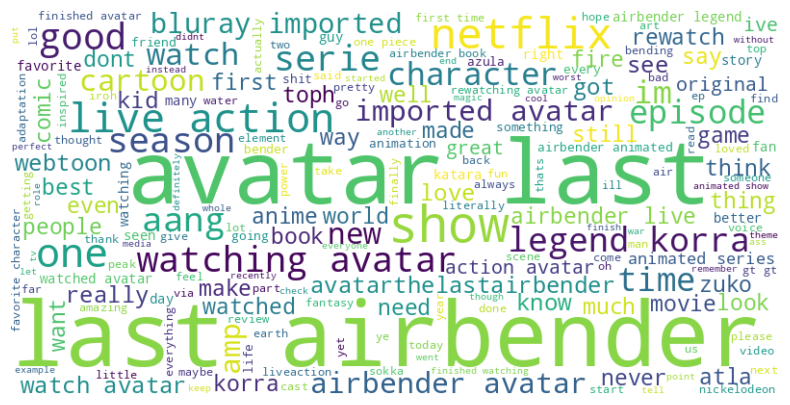

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_ava['lemmatized_text'] = df_ava['lemmatized_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Menggabungkan semua teks ke dalam satu string dan memisahkan kata-kata
all_text = " ".join(df_ava['lemmatized_text'].values)

# Inisialisasi objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


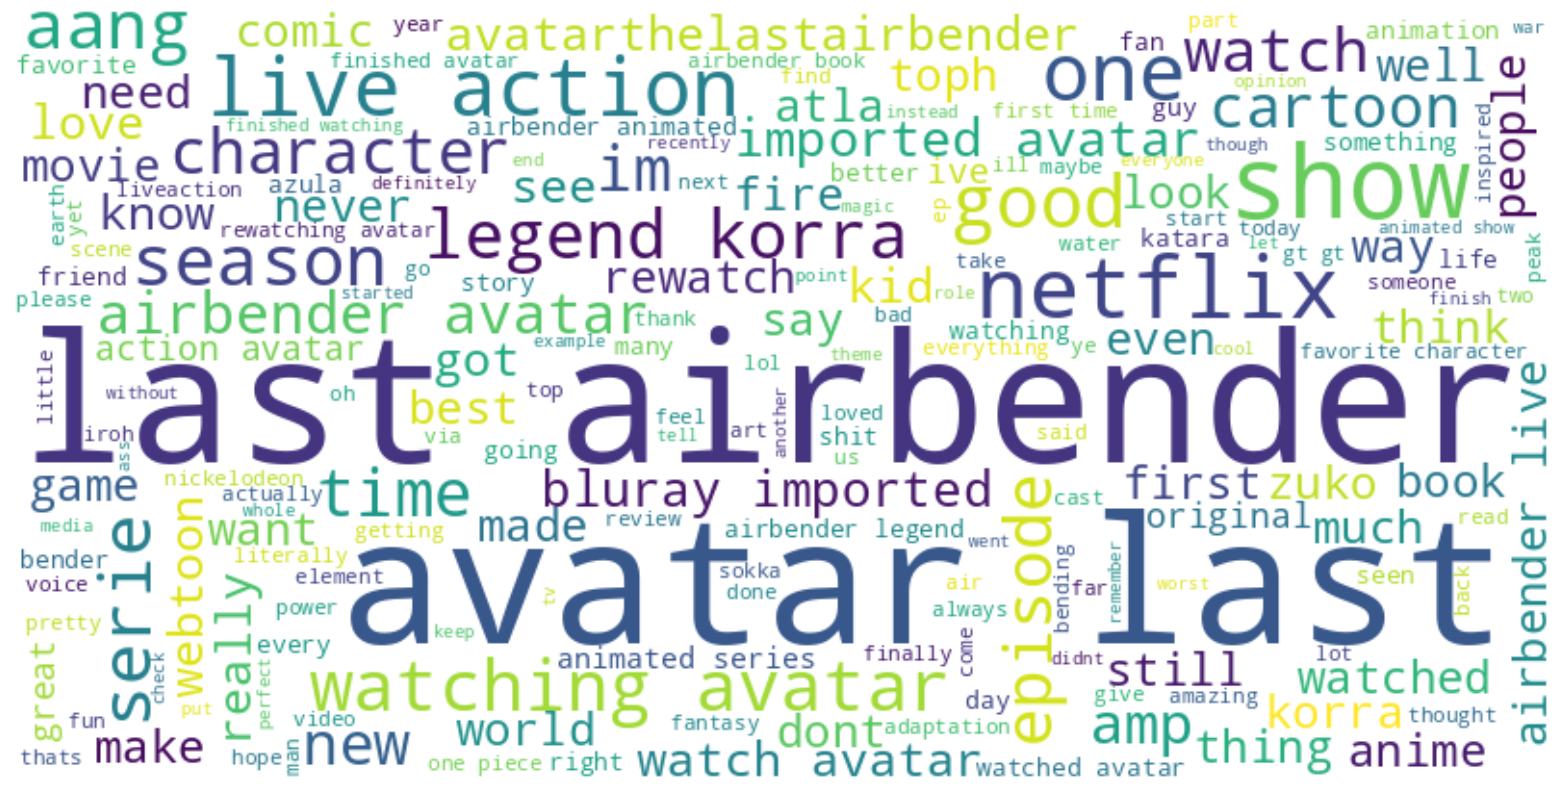

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua list kata-kata ke dalam satu string
all_text = " ".join(" ".join(words) for words in df_ava['lemmatized_text'])

# Inisialisasi objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plotting Word Cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Word Cloud 2 (tanpa memisahkan kata)

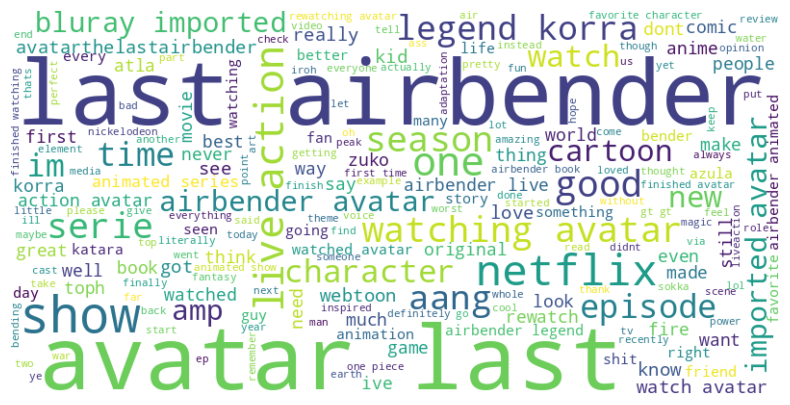

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks ke dalam satu string dan memisahkan kata-kata
all_text = " ".join(df_ava['text_combined'].values.flatten().astype(str).tolist())

# Inisialisasi objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download data yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Inisialisasi
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


# Tokenisasi kata dan proses tambahan
def preprocess_text(text):
    try:
        tokens = word_tokenize(text)
        normalized_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalnum()]
        filtered_tokens = [word for word in normalized_tokens if word not in stop_words]
        return filtered_tokens
    except TypeError:
        # Penanganan kesalahan jika nilai tidak dapat diolah
        return []

# Terapkan pada kolom 'lemmatized_text'
df_ava['processed_text'] = df_ava['lemmatized_text'].apply(preprocess_text)

# Word Frequency Analysis
word_freq = df_ava['processed_text'].explode().value_counts()

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
df_ava

lemmatized_text  \
0                                                                                                                                                                                   [opinion, two, topics, one, enjoy, watching, kung, fu, panda, live, action, avatar, last, airbender, series]   
18                                                                                        [finished, season, frieren, beyond, journey, end, moved, beautiful, animation, storytelling, soft, wholesome, reminds, fist, time, watched, avatar, last, airbender, highly, recommend, fantasy, fans]   
19                                                                                                                                                                                                        [today, played, stardew, valley, hours, finished, rewatching, avatar, last, airbender]   
20                                                                                                                                                                                                                                                                     [avatar, last, airbender]   
21                                                                                                                                                             [rewatched, avatar, last, airbender, kid, avid, katara, zuko, fan, rewatching, older, person, would, chosen, aang, thats, growth]   
22                                                                                                   [yet, never, made, better, hilariously, wrong, example, consult, martial, arts, experts, avatar, last, airbender, animated, fights, would, look, good, expertise, expertise, everyone, one]   
23                                                                                                                                                                                                                           [opinion, favorite, scene, avatar, last, airbender, carton, series]   
25                                                                                                                                                                                                                             [gon, na, watch, avatar, last, airbender, care, fortnite, collab]   
26                                                                                                                                                                                                                                                          [avatar, last, airbender, come, end]   
27                                                                                                                                [thought, professional, also, indian, guy, learned, fire, bender, like, ancestors, ghostbusters, avatar, last, airbender, see, training, prepare, final, boss]   
28                                                                                                                                                                                                                                    [triple, avatar, aang, last, airbender, amination, series]   
29                                                                                                                                         [reply, give, letter, got, aangavatar, last, airbender, arataka, reigen, mob, psycho, ayanami, rei, neon, genesis, evangelion, asuka, kazama, tekken]   
30                                                                                                                                                                                                                                                               [pack, avatar, last, airbender]   
31                                                                                                                                                                                       

In [ ]:
from google.colab import files

# Simpan DataFrame sebagai file CSV di direktori kerja saat ini di Colab
file_name = 'hasil_analisis.csv'
file_path = '/content/' + file_name
df_ava.to_csv(file_path, index=False)

# Unduh file CSV ke lokal
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>